In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
kB = 1.380649e-23  # in J/K
Na = 6.02214076e23  # Avogadro's number

In [3]:
plt.rcParams.update({'text.usetex':True, 
'font.family':'sans-serif', 
'font.size':18, 
'axes.linewidth':1.1,
'text.latex.preamble': r'\usepackage{sfmath}'
})

colors = sns.color_palette(palette='mako', n_colors=7)
colors

[(0.16914226, 0.10805832, 0.20589698),
 (0.24423453, 0.20678459, 0.41985299),
 (0.23318874, 0.33648036, 0.59775543),
 (0.20692679, 0.48201774, 0.63812656),
 (0.20795035, 0.62210845, 0.66867802),
 (0.29215894, 0.76144162, 0.67886578),
 (0.60028928, 0.86793835, 0.71523675)]

In [4]:
framework_name='IRMOF-1'
T = 195.0

In [5]:
MM = 15.999*2+12.0
#exp_data = pd.read_csv(f'CO2-{framework_name}/{T:.0f}K/CO2_{framework_name}_{T:.0f}K_exp_ads.csv', skiprows=11)
#exp_data['pressure'] = exp_data['pressure']*0.1333223684
#exp_data['total_adsorption'] = exp_data['total_adsorption']/MM

/tmp/ipykernel_27500/3982372259.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16, frameon=False, edgecolor='k')


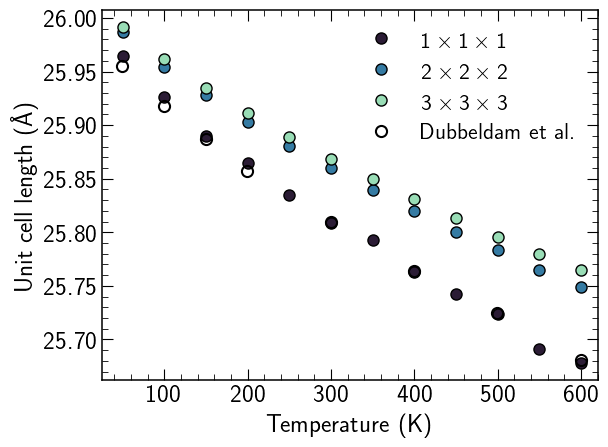

In [6]:
plt.legend(fontsize=16, frameon=False, edgecolor='k')

exp = pd.read_csv('dubbeldam.csv')

box1 = pd.read_csv(f'{framework_name}/{framework_name}_MD.csv')
box2 = pd.read_csv(f'{framework_name}-2x2x2/{framework_name}_MD.csv')
box3 = pd.read_csv(f'{framework_name}-3x3x3/{framework_name}_MD.csv') 

plt.plot(box1['Temperature (K)'], 1e1*box1['Unit-cell length (nm)'],'o', color=colors[0], 
         lw=1.75, ms=8, mec='k', label=r'$1 \times 1 \times 1$')
plt.plot(box2['Temperature (K)'], 1e1*box2['Unit-cell length (nm)']/2,'o', color=colors[3], 
         lw=1.75, ms=8, mec='k', label=r'$2 \times 2 \times 2$')
plt.plot(box3['Temperature (K)'], 1e1*box3['Unit-cell length (nm)']/3,'o', color=colors[6], 
         lw=1.75, ms=8, mec='k', label=r'$3 \times 3 \times 3$')

plt.plot(exp['temperature'], exp['length'],'o', color='k', ms=8, mew=1.5, mfc='None', label=r'Dubbeldam et al.')

plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel(r'Unit cell length (\AA{})', fontsize=18)
plt.xlim((25., 620.))
# plt.ylim((25.60, 25.95))
plt.minorticks_on()
# plt.xscale('log')
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=18)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=4, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=8, bottom=True, top=True, left=True, right=True)
plt.legend(fontsize=16, frameon=False, edgecolor='k')
plt.savefig('negative_thermal_expansion.pdf', bbox_inches='tight')

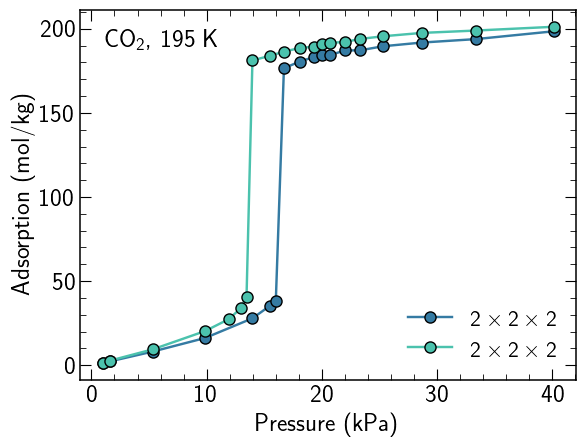

In [7]:
# Rigid

rig1 = pd.read_csv(f'CO2-{framework_name}/{T:.0f}K/rigid/CO2_{framework_name}_{T:.2f}K.csv')
rig2 = pd.read_csv(f'CO2-{framework_name}-2x2x2/{T:.0f}K/rigid/CO2_{framework_name}_{T:.2f}K.csv')
rig3 = pd.read_csv(f'CO2-{framework_name}-2x2x2/{T:.0f}K_rc=14A/rigid/CO2_{framework_name}_{T:.2f}K.csv')

# plt.plot(1e-3*rig1['Pressure (Pa)'], rig1['Absolute adsorption (mol/kg)'],'-o', color=colors[0], 
#          lw=1.75, ms=8, mec='k', label=r'$1 \times 1 \times 1$')
plt.plot(rig2['Pressure (kPa)'], rig2['Adsorption (molecules/uc)'],'-o', color=colors[3], 
         lw=1.75, ms=8, mec='k', label=r'$2 \times 2 \times 2$')
plt.plot(rig3['Pressure (kPa)'], rig3['Adsorption (molecules/uc)'],'-o', color=colors[5],
         lw=1.75, ms=8, mec='k', label=r'$2 \times 2 \times 2$')
# plt.plot(exp_data['pressure'][0:17], exp_data['total_adsorption'][0:17],'s', color='k',ms=7, mew=1.5, mfc='None', label=r'Experimental')
plt.xlabel('Pressure (kPa)', fontsize=18)
plt.ylabel('Adsorption (mol/kg)',fontsize=18)
plt.minorticks_on()
# plt.xscale('log')
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=18)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=4, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=8, bottom=True, top=True, left=True, right=True)
plt.legend(fontsize=16, frameon=False, edgecolor='k')
plt.text(0.05, 0.95, r'CO$_{2}$, 195 K', transform=plt.gca().transAxes, 
            fontsize=18, verticalalignment='top')
plt.savefig('adsorption_isotherm_rigid.pdf', bbox_inches='tight')

In [8]:
# Flexible

fl1 = pd.read_csv(f'CO2-{framework_name}/{T:.0f}K/CO2_{framework_name}_{T:.2f}K_GCMC-MD.csv')
fl2 = pd.read_csv(f'CO2-{framework_name}-2x2x2/{T:.0f}K/CO2_{framework_name}_{T:.2f}K_GCMC-MD.csv') 
fl3 = pd.read_csv(f'CO2-{framework_name}-2x2x2/{T:.0f}K_rc=14A/CO2_{framework_name}_{T:.2f}K_GCMC-MD.csv') 

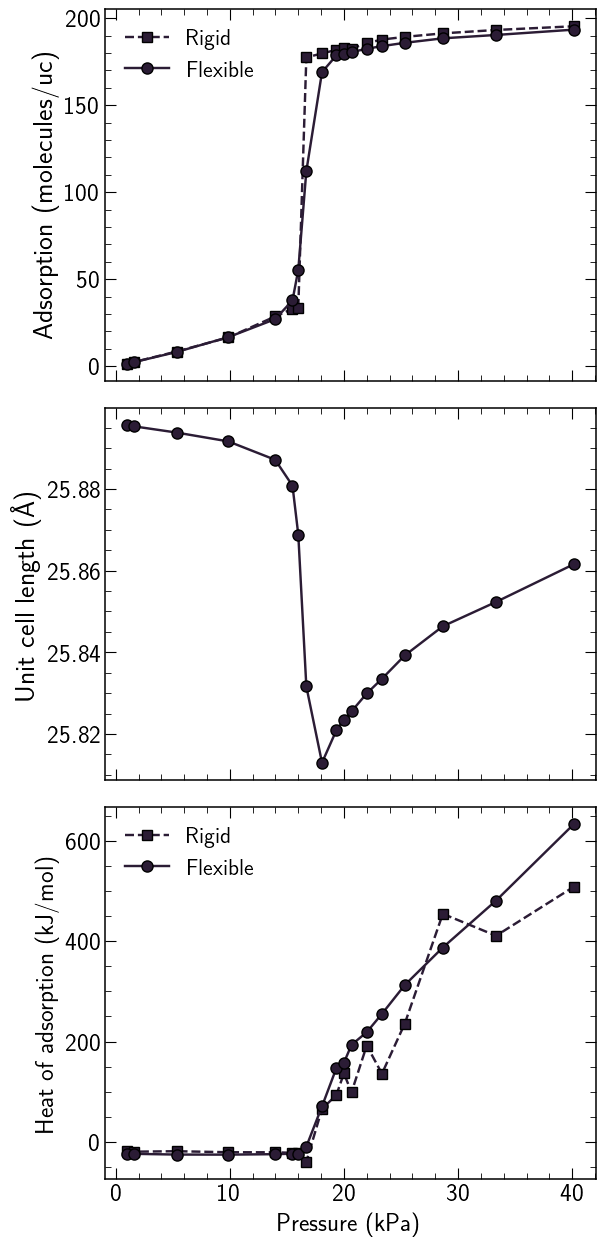

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8*3), sharex=True)

ax1.plot(rig1['Pressure (kPa)'], rig1['Adsorption (molecules/uc)'],'--s', lw=1.75, 
         color=colors[0],mec='k', ms=7, label=r'Rigid')
ax1.plot(fl1['Pressure (kPa)'], fl1['Adsorption (molecules/uc)'],'-o', lw=1.75, 
         color=colors[0], mec='k', ms=8, label=r'Flexible')
ax1.set_ylabel('Adsorption (molecules/uc)', fontsize=20)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax1.tick_params(direction='in', right=True, top=True)
ax1.tick_params(labelsize=18)
ax1.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax1.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax1.legend(fontsize=16, frameon=False, edgecolor='k')

ax2.plot(fl1['Pressure (kPa)'], fl1['Unit cell length (Angstrom)'],'-o', lw=1.75, 
         color=colors[0], mec='k', markersize=8)
ax2.set_ylabel(r'Unit cell length (\AA{})', fontsize=20)
# ax2.set_xlim((-0.02, 0.42))
# ax2.set_ylim((25.74, 25.85))
ax2.minorticks_on()
ax2.tick_params(direction='in', right=True, top=True)
ax2.tick_params(labelsize=18)
ax2.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax2.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)

ax3.plot(rig1['Pressure (kPa)'], rig1['Heat of adsorption (kJ/mol)'],'--s', lw=1.75, 
         color=colors[0],mec='k', ms=7, label=r'Rigid')
ax3.plot(fl1['Pressure (kPa)'], fl1['Heat of adsorption (kJ/mol)'],'-o', lw=1.75, 
         color=colors[0], mec='k', ms=8, label=r'Flexible')
ax3.set_xlabel('Pressure (kPa)', fontsize=18)
ax3.set_ylabel('Heat of adsorption (kJ/mol)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax3.minorticks_on()
ax3.tick_params(direction='in', right=True, top=True)
ax3.tick_params(labelsize=18)
ax3.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax3.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax3.legend(fontsize=16, frameon=False, edgecolor='k')

plt.tight_layout(rect=[0, 0, 1, 0.89])
plt.savefig('adsorption_co2_si_a.pdf', bbox_inches='tight')

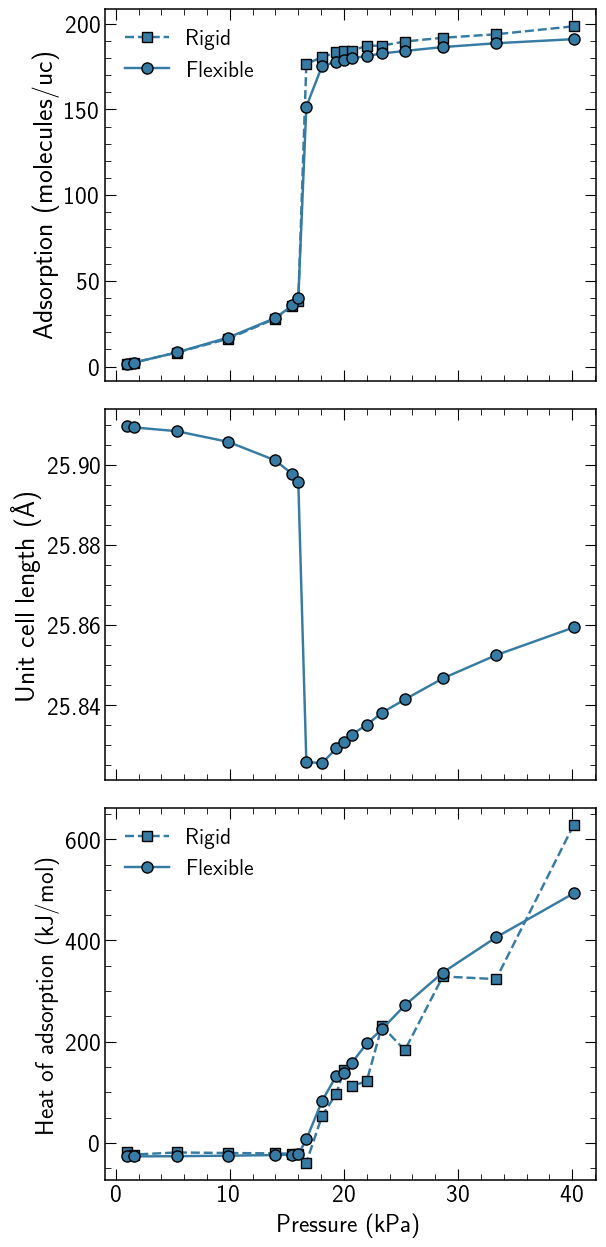

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8*3), sharex=True)

ax1.plot(rig2['Pressure (kPa)'], rig2['Adsorption (molecules/uc)'],'--s', lw=1.75, 
         color=colors[3],mec='k', ms=7, label=r'Rigid')
ax1.plot(fl2['Pressure (kPa)'], fl2['Adsorption (molecules/uc)'],'-o', lw=1.75, 
         color=colors[3], mec='k', ms=8, label=r'Flexible')
ax1.set_ylabel('Adsorption (molecules/uc)', fontsize=20)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax1.tick_params(direction='in', right=True, top=True)
ax1.tick_params(labelsize=18)
ax1.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax1.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax1.legend(fontsize=16, frameon=False, edgecolor='k')

ax2.plot(fl2['Pressure (kPa)'], fl2['Unit cell length (Angstrom)'],'-o', lw=1.75, 
         color=colors[3], mec='k', markersize=8)
ax2.set_ylabel(r'Unit cell length (\AA{})', fontsize=20)
# ax2.set_xlim((-0.02, 0.42))
# ax2.set_ylim((25.74, 25.85))
ax2.minorticks_on()
ax2.tick_params(direction='in', right=True, top=True)
ax2.tick_params(labelsize=18)
ax2.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax2.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)

ax3.plot(rig2['Pressure (kPa)'], rig2['Heat of adsorption (kJ/mol)'],'--s', lw=1.75, 
         color=colors[3],mec='k', ms=7, label=r'Rigid')
ax3.plot(fl2['Pressure (kPa)'], fl2['Heat of adsorption (kJ/mol)'],'-o', lw=1.75, 
         color=colors[3], mec='k', ms=8, label=r'Flexible')
ax3.set_xlabel('Pressure (kPa)', fontsize=18)
ax3.set_ylabel('Heat of adsorption (kJ/mol)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax3.minorticks_on()
ax3.tick_params(direction='in', right=True, top=True)
ax3.tick_params(labelsize=18)
ax3.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax3.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax3.legend(fontsize=16, frameon=False, edgecolor='k')

plt.tight_layout(rect=[0, 0, 1, 0.89])
plt.savefig('adsorption_co2_si_b.pdf', bbox_inches='tight')

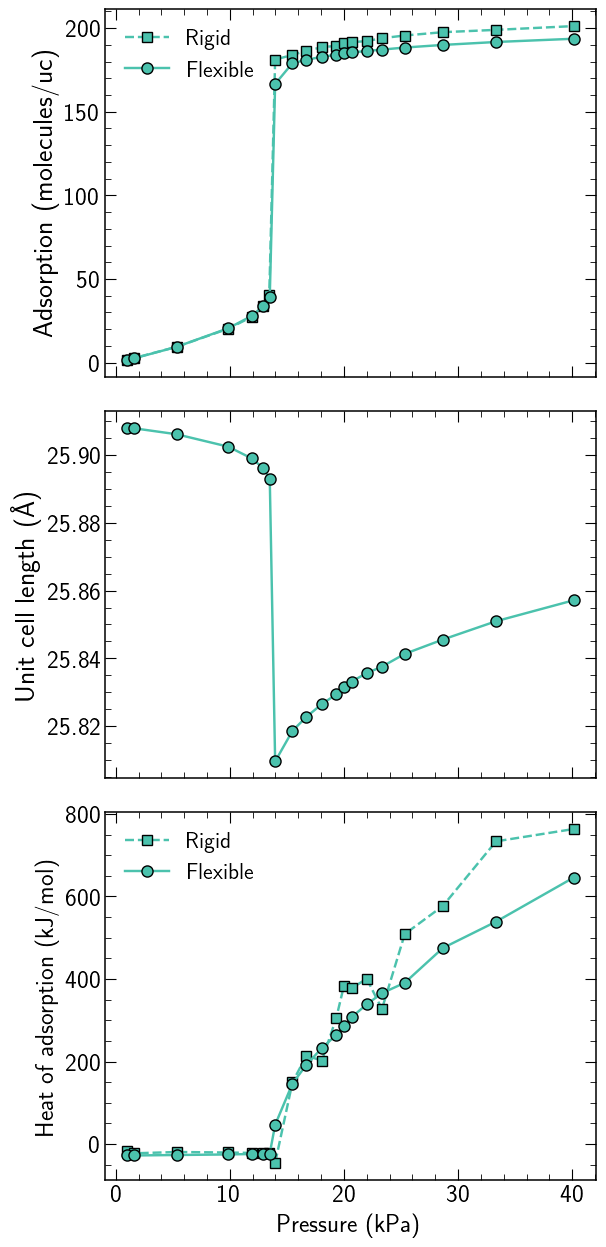

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8*3), sharex=True)

ax1.plot(rig3['Pressure (kPa)'], rig3['Adsorption (molecules/uc)'],'--s', lw=1.75, 
         color=colors[5],mec='k', ms=7, label=r'Rigid')
ax1.plot(fl3['Pressure (kPa)'], fl3['Adsorption (molecules/uc)'],'-o', lw=1.75, 
         color=colors[5], mec='k', ms=8, label=r'Flexible')
ax1.set_ylabel('Adsorption (molecules/uc)', fontsize=20)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax1.tick_params(direction='in', right=True, top=True)
ax1.tick_params(labelsize=18)
ax1.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax1.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax1.legend(fontsize=16, frameon=False, edgecolor='k')

ax2.plot(fl3['Pressure (kPa)'], fl3['Unit cell length (Angstrom)'],'-o', lw=1.75, 
         color=colors[5], mec='k', markersize=8)
ax2.set_ylabel(r'Unit cell length (\AA{})', fontsize=20)
# ax2.set_xlim((-0.02, 0.42))
# ax2.set_ylim((25.74, 25.85))
ax2.minorticks_on()
ax2.tick_params(direction='in', right=True, top=True)
ax2.tick_params(labelsize=18)
ax2.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax2.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)

ax3.plot(rig3['Pressure (kPa)'], rig3['Heat of adsorption (kJ/mol)'],'--s', lw=1.75, 
         color=colors[5],mec='k', ms=7, label=r'Rigid')
ax3.plot(fl3['Pressure (kPa)'], fl3['Heat of adsorption (kJ/mol)'],'-o', lw=1.75, 
         color=colors[5], mec='k', ms=8, label=r'Flexible')
ax3.set_xlabel('Pressure (kPa)', fontsize=18)
ax3.set_ylabel('Heat of adsorption (kJ/mol)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax3.minorticks_on()
ax3.tick_params(direction='in', right=True, top=True)
ax3.tick_params(labelsize=18)
ax3.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax3.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax3.legend(fontsize=16, frameon=False, edgecolor='k')

plt.tight_layout(rect=[0, 0, 1, 0.89])
plt.savefig('adsorption_co2_si_c.pdf', bbox_inches='tight')

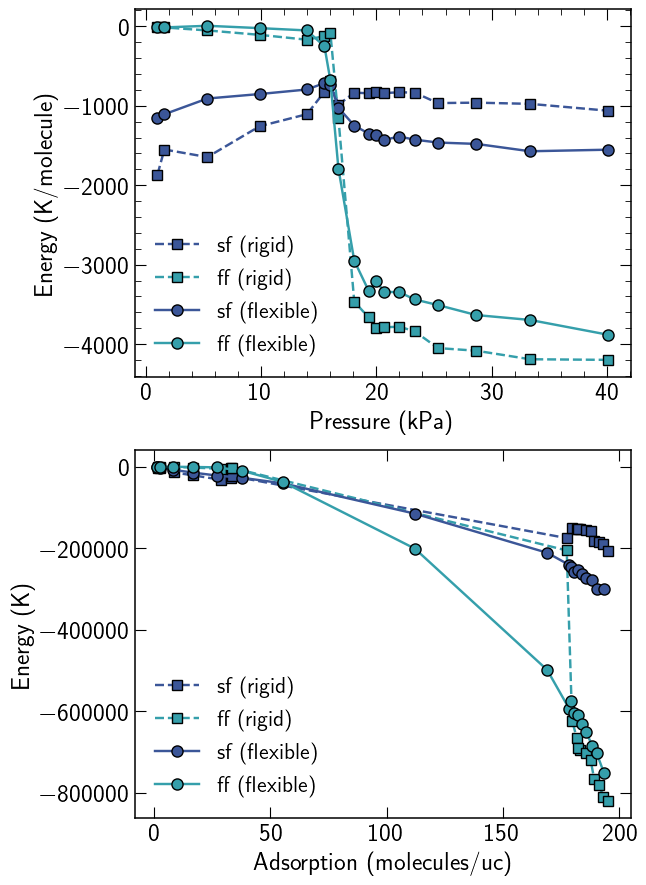

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.4, 10.5))

ax1.plot(rig1['Pressure (kPa)'], (rig1['Solid-fluid energy (K)'])/(rig1['Adsorption (molecules/uc)']),'--s', color=colors[2],
         lw=1.75, ms=7, mec='k', label=r'sf (rigid)')
ax1.plot(rig1['Pressure (kPa)'], (rig1['Fluid-fluid energy (K)'])/(rig1['Adsorption (molecules/uc)']),'--s', color=colors[4],
         lw=1.75, ms=7, mec='k', label=r'ff (rigid)')
ax1.plot(fl1['Pressure (kPa)'], (fl1['Solid-fluid energy (K)'])/(fl1['Adsorption (molecules/uc)']),'-o', color=colors[2],
         lw=1.75, ms=8, mec='k', label=r'sf (flexible)')
ax1.plot(fl1['Pressure (kPa)'], (fl1['Fluid-fluid energy (K)'])/(fl1['Adsorption (molecules/uc)']),'-o', color=colors[4],
         lw=1.75, ms=8, mec='k', label=r'ff (flexible)')
ax1.set_xlabel('Pressure (kPa)', fontsize=18)
ax1.set_ylabel('Energy (K/molecule)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax1.tick_params(direction='in', right=True, top=True)
ax1.tick_params(labelsize=18)
ax1.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax1.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax1.legend(fontsize=16, frameon=False, edgecolor='k')

ax2.plot(rig1['Adsorption (molecules/uc)'], (rig1['Solid-fluid energy (K)']),'--s', color=colors[2],
         lw=1.75, ms=7, mec='k', label=r'sf (rigid)')
ax2.plot(rig1['Adsorption (molecules/uc)'], (rig1['Fluid-fluid energy (K)']),'--s', color=colors[4],
         lw=1.75, ms=7, mec='k', label=r'ff (rigid)')
ax2.plot(fl1['Adsorption (molecules/uc)'], fl1['Solid-fluid energy (K)'],'-o', color=colors[2],
         lw=1.75, ms=8, mec='k', label=r'sf (flexible)')
ax2.plot(fl1['Adsorption (molecules/uc)'], fl1['Fluid-fluid energy (K)'],'-o', color=colors[4],
         lw=1.75, ms=8, mec='k', label=r'ff (flexible)')
ax2.set_xlabel('Adsorption (molecules/uc)', fontsize=18)
ax2.set_ylabel('Energy (K)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax2.tick_params(direction='in', right=True, top=True)
ax2.tick_params(labelsize=18)
ax2.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax2.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax2.legend(fontsize=16, frameon=False, edgecolor='k')
plt.savefig('energy_co2_si_a.pdf', bbox_inches='tight')

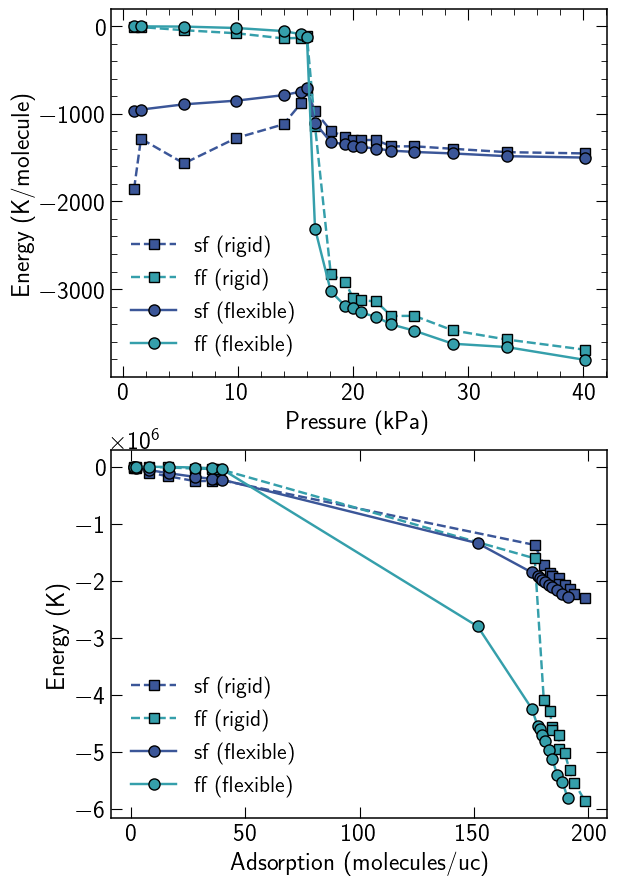

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.4, 10.5))

ax1.plot(rig2['Pressure (kPa)'], (rig2['Solid-fluid energy (K)'])/(rig2['Adsorption (molecules/uc)']*8),'--s', color=colors[2],
         lw=1.75, ms=7, mec='k', label=r'sf (rigid)')
ax1.plot(rig2['Pressure (kPa)'], (rig2['Fluid-fluid energy (K)'])/(rig2['Adsorption (molecules/uc)']*8),'--s', color=colors[4],
         lw=1.75, ms=7, mec='k', label=r'ff (rigid)')
ax1.plot(fl2['Pressure (kPa)'], (fl2['Solid-fluid energy (K)'])/(fl2['Adsorption (molecules/uc)']*8),'-o', color=colors[2],
         lw=1.75, ms=8, mec='k', label=r'sf (flexible)')
ax1.plot(fl2['Pressure (kPa)'], (fl2['Fluid-fluid energy (K)'])/(fl2['Adsorption (molecules/uc)']*8),'-o', color=colors[4],
         lw=1.75, ms=8, mec='k', label=r'ff (flexible)')
ax1.set_xlabel('Pressure (kPa)', fontsize=18)
ax1.set_ylabel('Energy (K/molecule)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax1.tick_params(direction='in', right=True, top=True)
ax1.tick_params(labelsize=18)
ax1.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax1.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax1.legend(fontsize=16, frameon=False, edgecolor='k')

ax2.plot(rig2['Adsorption (molecules/uc)'], (rig2['Solid-fluid energy (K)']),'--s', color=colors[2],
         lw=1.75, ms=7, mec='k', label=r'sf (rigid)')
ax2.plot(rig2['Adsorption (molecules/uc)'], (rig2['Fluid-fluid energy (K)']),'--s', color=colors[4],
         lw=1.75, ms=7, mec='k', label=r'ff (rigid)')
ax2.plot(fl2['Adsorption (molecules/uc)'], fl2['Solid-fluid energy (K)'],'-o', color=colors[2],
         lw=1.75, ms=8, mec='k', label=r'sf (flexible)')
ax2.plot(fl2['Adsorption (molecules/uc)'], fl2['Fluid-fluid energy (K)'],'-o', color=colors[4],
         lw=1.75, ms=8, mec='k', label=r'ff (flexible)')
ax2.set_xlabel('Adsorption (molecules/uc)', fontsize=18)
ax2.set_ylabel('Energy (K)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax2.tick_params(direction='in', right=True, top=True)
ax2.tick_params(labelsize=18)
ax2.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax2.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax2.legend(fontsize=16, frameon=False, edgecolor='k')
plt.savefig('energy_co2_si_b.pdf', bbox_inches='tight')

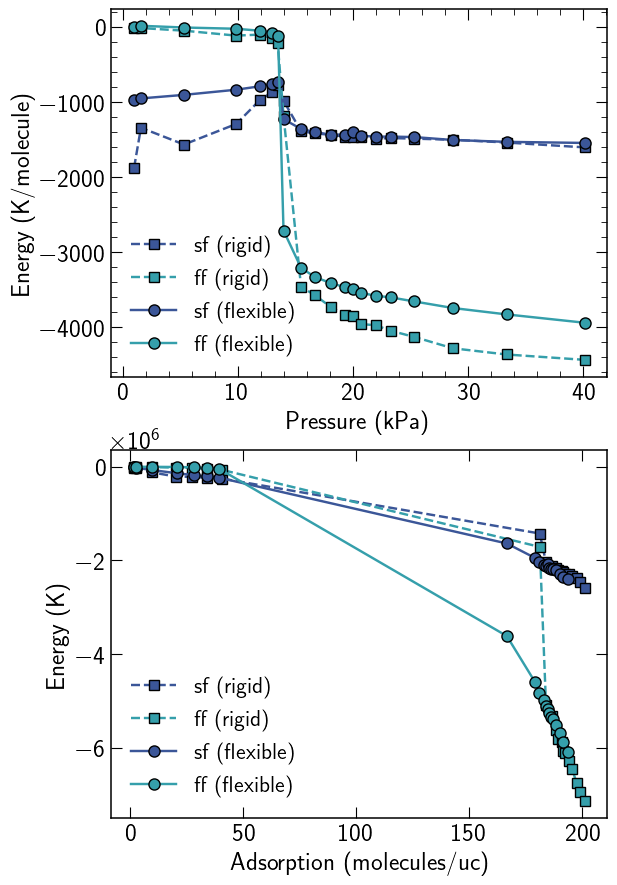

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.4, 10.5))

ax1.plot(rig3['Pressure (kPa)'], (rig3['Solid-fluid energy (K)'])/(rig3['Adsorption (molecules/uc)']*8),'--s', color=colors[2],
         lw=1.75, ms=7, mec='k', label=r'sf (rigid)')
ax1.plot(rig3['Pressure (kPa)'], (rig3['Fluid-fluid energy (K)'])/(rig3['Adsorption (molecules/uc)']*8),'--s', color=colors[4],
         lw=1.75, ms=7, mec='k', label=r'ff (rigid)')
ax1.plot(fl3['Pressure (kPa)'], (fl3['Solid-fluid energy (K)'])/(fl3['Adsorption (molecules/uc)']*8),'-o', color=colors[2],
         lw=1.75, ms=8, mec='k', label=r'sf (flexible)')
ax1.plot(fl3['Pressure (kPa)'], (fl3['Fluid-fluid energy (K)'])/(fl3['Adsorption (molecules/uc)']*8),'-o', color=colors[4],
         lw=1.75, ms=8, mec='k', label=r'ff (flexible)')
ax1.set_xlabel('Pressure (kPa)', fontsize=18)
ax1.set_ylabel('Energy (K/molecule)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax1.tick_params(direction='in', right=True, top=True)
ax1.tick_params(labelsize=18)
ax1.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax1.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax1.legend(fontsize=16, frameon=False, edgecolor='k')

ax2.plot(rig3['Adsorption (molecules/uc)'], (rig3['Solid-fluid energy (K)']),'--s', color=colors[2],
         lw=1.75, ms=7, mec='k', label=r'sf (rigid)')
ax2.plot(rig3['Adsorption (molecules/uc)'], (rig3['Fluid-fluid energy (K)']),'--s', color=colors[4],
         lw=1.75, ms=7, mec='k', label=r'ff (rigid)')
ax2.plot(fl3['Adsorption (molecules/uc)'], fl3['Solid-fluid energy (K)'],'-o', color=colors[2],
         lw=1.75, ms=8, mec='k', label=r'sf (flexible)')
ax2.plot(fl3['Adsorption (molecules/uc)'], fl3['Fluid-fluid energy (K)'],'-o', color=colors[4],
         lw=1.75, ms=8, mec='k', label=r'ff (flexible)')
ax2.set_xlabel('Adsorption (molecules/uc)', fontsize=18)
ax2.set_ylabel('Energy (K)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax2.tick_params(direction='in', right=True, top=True)
ax2.tick_params(labelsize=18)
ax2.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax2.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax2.legend(fontsize=16, frameon=False, edgecolor='k')
plt.savefig('energy_co2_si_c.pdf', bbox_inches='tight')

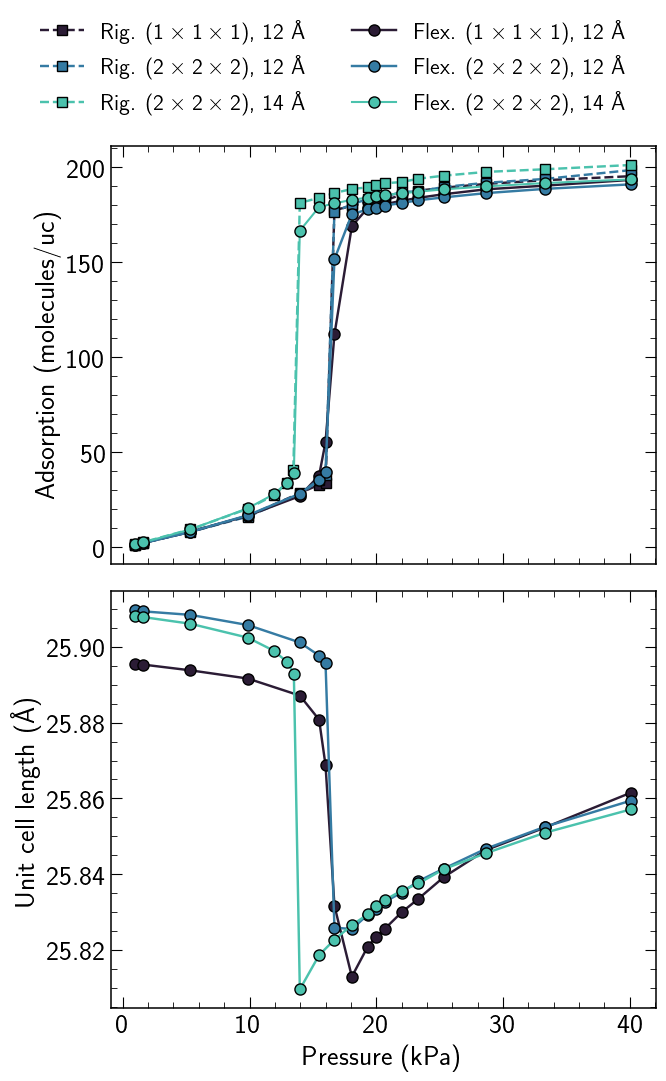

In [15]:
# Cria figura com dois subplots verticais compartilhando o eixo x
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.0,11.), sharex=True)

# Primeiro gráfico (adsorção)
ax1.plot(rig1['Pressure (kPa)'], rig1['Adsorption (molecules/uc)'],'--s', lw=1.75, 
        color=colors[0], mec='k', ms=7, label=r'Rig. $(1 \times 1 \times 1)$, 12 \AA{}'),
ax1.plot(rig2['Pressure (kPa)'], rig2['Adsorption (molecules/uc)'],'--s', lw=1.75, 
         color=colors[3],mec='k', ms=7, label=r'Rig. $(2 \times 2 \times 2)$, 12 \AA{}')
ax1.plot(rig3['Pressure (kPa)'], rig3['Adsorption (molecules/uc)'],'--s', lw=1.75, 
         color=colors[5], mec='k', ms=7, label=r'Rig. $(2 \times 2 \times 2)$, 14 \AA{}')


ax1.plot(fl1['Pressure (kPa)'], fl1['Adsorption (molecules/uc)'],'-o', lw=1.75, 
        color=colors[0], mec='k', ms=8, label=r'Flex. $(1 \times 1 \times 1)$, 12 \AA{}')
ax1.plot(fl2['Pressure (kPa)'], fl2['Adsorption (molecules/uc)'],'-o', lw=1.75, 
         color=colors[3], mec='k', ms=8, label=r'Flex. $(2 \times 2 \times 2)$, 12 \AA{}')
ax1.plot(fl3['Pressure (kPa)'], fl3['Adsorption (molecules/uc)'],'-o', lw=1.5, 
         color=colors[5], mec='k', ms=8, label=r'Flex. $(2 \times 2 \times 2)$, 14 \AA{}')

ax1.set_ylabel('Adsorption (molecules/uc)', fontsize=20)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax1.tick_params(direction='in', right=True, top=True)
ax1.tick_params(labelsize=20)
ax1.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax1.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
# ax1.legend(fontsize=14, frameon=False, edgecolor='k')

# Segundo gráfico (deformação)
ax2.plot(fl1['Pressure (kPa)'], fl1['Unit cell length (Angstrom)'],'-o', lw=1.75, 
        color=colors[0], mec='k', markersize=8)
ax2.plot(fl2['Pressure (kPa)'], fl2['Unit cell length (Angstrom)'],'-o', lw=1.75, 
         color=colors[3], mec='k', markersize=8)
ax2.plot(fl3['Pressure (kPa)'], fl3['Unit cell length (Angstrom)'],'-o', lw=1.75, 
         color=colors[5], mec='k', markersize=8)

ax2.set_xlabel('Pressure (kPa)', fontsize=20)
ax2.set_ylabel(r'Unit cell length (\AA{})', fontsize=20)
# ax2.set_xlim((-0.02, 0.42))
# ax2.set_ylim((25.74, 25.85))
ax2.minorticks_on()
ax2.tick_params(direction='in', right=True, top=True)
ax2.tick_params(labelsize=20)
ax2.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax2.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
# ax2.legend(fontsize=14, frameon=False, edgecolor='k')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',  
           fontsize=16, frameon=False, ncol=2)

# Ajusta o layout para dar espaço para a legenda
plt.tight_layout(rect=[0, 0, 1, 0.89])  # Ajuste o último valor (0.96) conforme necessário

# Adiciona um título geral (opcional)
# fig.suptitle('Adsorption and Strain Isotherms', fontsize=20, y=1.02)

# Salva a figura
plt.savefig('adsorption_strain_co2.pdf', bbox_inches='tight')
plt.show()

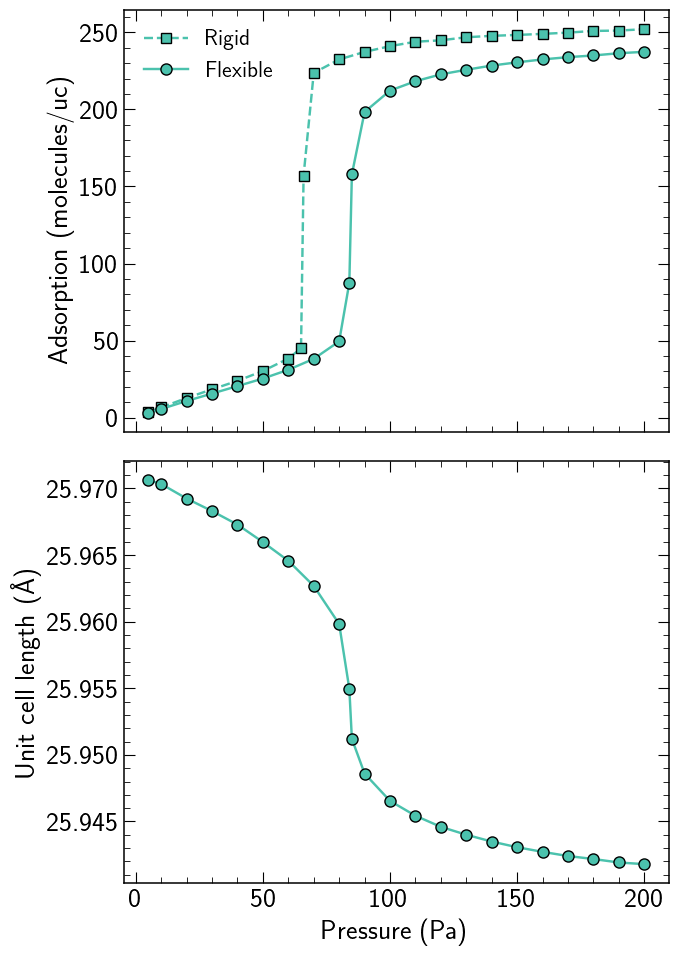

In [16]:
T = 78.0

# rig1 = pd.read_csv(f'Ar-{framework_name}/rigid/argon_{framework_name}_{T:.2f}K.csv')
# fl1 = pd.read_csv(f'Ar-{framework_name}/argon_{framework_name}_{T:.2f}K_GCMC-MD.csv') 

rig2 = pd.read_csv(f'Ar-{framework_name}_rc=14A/rigid/Ar_{framework_name}_{T:.2f}K.csv')
fl2 = pd.read_csv(f'Ar-{framework_name}_rc=14A/Ar_{framework_name}_{T:.2f}K_GCMC-MD.csv')

# Cria figura com dois subplots verticais compartilhando o eixo x
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.0,11.0), sharex=True)

# Primeiro gráfico (adsorção)
# ax1.plot(rig1['Pressure (Pa)'], rig1['Absolute adsorption (mol/kg)'],'--o', 
#          color=colors[0], ms=8, mew=1.5, mfc='None', label=r'$1 \times 1 \times 1$ rigid')
# ax1.plot(fl1['Pressure (Pa)'], fl1['Absolute adsorption (mol/kg)'],'-o', 
#          color=colors[0], ms=8, label=r'$1 \times 1 \times 1$ flexible')

ax1.plot(rig2['Pressure (Pa)'], rig2['Adsorption (molecules/uc)'],'--s', lw=1.75, 
         color=colors[5], ms=7, mec='k', label=r'Rigid')
ax1.plot(fl2['Pressure (Pa)'], fl2['Adsorption (molecules/uc)'],'-o', lw=1.75,  
         color=colors[5], ms=8, mec='k', label=r'Flexible')

ax1.set_ylabel('Adsorption (molecules/uc)', fontsize=20)
# ax1.set_xlim((-2., 42.))
# ax1.set_ylim((-2., 50.))
ax1.minorticks_on()
ax1.tick_params(direction='in', right=True, top=True)
ax1.tick_params(labelsize=20)
ax1.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax1.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax1.legend(fontsize=16, frameon=False, edgecolor='k')

# Segundo gráfico (deformação)
# ax2.plot(fl1['Pressure (Pa)'], fl1['Strain (%)'],'-o', 
#          color=colors[0], markersize=7.5, label=r'$1 \times 1 \times 1$')
ax2.plot(fl2['Pressure (Pa)'], fl2['Unit cell length (Angstrom)'],'-o', lw=1.75, 
         color=colors[5], mec='k', markersize=8)
# ax2.set_xscale('log')
ax2.set_xlabel('Pressure (Pa)', fontsize=20)
ax2.set_ylabel(r'Unit cell length (\AA{})', fontsize=20)
# ax2.set_xlim((-0.02, 0.34))
# ax2.set_ylim((25.87, 25.98))
ax2.minorticks_on()
ax2.tick_params(direction='in', right=True, top=True)
ax2.tick_params(labelsize=20)
ax2.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax2.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
# ax2.legend(fontsize=14, frameon=False, edgecolor='k')

handles, labels = ax1.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center',  
#            fontsize=18, frameon=False, 
#            ncol=2)

# Ajusta o layout para dar espaço para a legenda
plt.tight_layout(rect=[0, 0, 1, 0.90])  # Ajuste o último valor (0.96) conforme necessário

# Adiciona um título geral (opcional)
# fig.suptitle('Adsorption and Strain Isotherms', fontsize=20, y=1.02)

# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# axins1 = inset_axes(ax1, width="50%", height="50%", loc='center right')  # tamanho e posição
# axins1.plot(rig2['Pressure (Pa)'], rig2['Adsorption (molecules/uc)'],'--s', lw=1.5, 
#          color=colors[5], ms=5, mec='k')
# axins1.plot(fl2['Pressure (Pa)'], fl2['Adsorption (molecules/uc)'],'-o', lw=1.5,  
#          color=colors[5], ms=5, mec='k')
# axins1.set_xscale('log')
# # ax1.set_ylim((-2., 50.))
# axins1.tick_params(labelsize=12, direction='in')

# axins2 = inset_axes(ax2, width="50%", height="50%", loc='upper right')  # tamanho e posição
# axins2.plot(fl2['Pressure (Pa)'], fl2['Unit cell length (Angstrom)'],'-o', lw=1.5,  
#          color=colors[5], ms=5, mec='k')
# axins2.set_xscale('log')
# # ax2.set_ylim((25.875, 25.903))
# axins2.tick_params(labelsize=12, direction='in')


# Salva a figura
plt.savefig('adsorption_strain_argon.pdf', bbox_inches='tight')
plt.show()

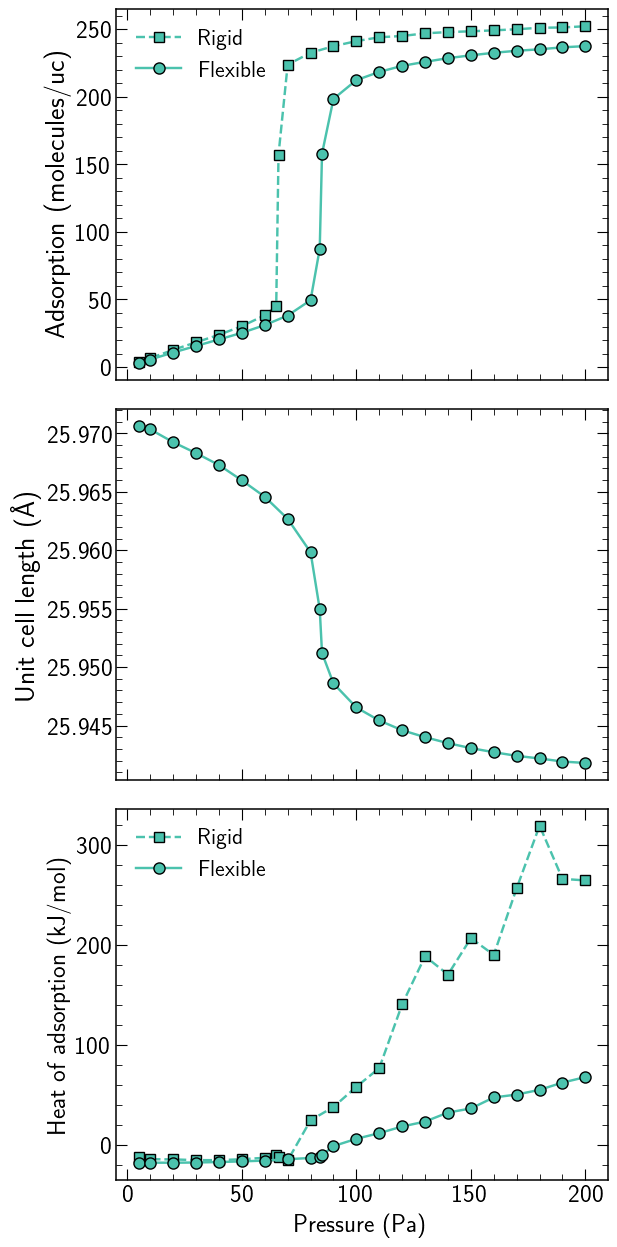

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 4.8*3), sharex=True)

ax1.plot(rig2['Pressure (Pa)'], rig2['Adsorption (molecules/uc)'],'--s', lw=1.75, 
         color=colors[5],mec='k', ms=7, label=r'Rigid')
ax1.plot(fl2['Pressure (Pa)'], fl2['Adsorption (molecules/uc)'],'-o', lw=1.75, 
         color=colors[5], mec='k', ms=8, label=r'Flexible')
ax1.set_ylabel('Adsorption (molecules/uc)', fontsize=20)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax1.tick_params(direction='in', right=True, top=True)
ax1.tick_params(labelsize=18)
ax1.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax1.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax1.legend(fontsize=16, frameon=False, edgecolor='k')

ax2.plot(fl2['Pressure (Pa)'], fl2['Unit cell length (Angstrom)'],'-o', lw=1.75, 
         color=colors[5], mec='k', markersize=8)
ax2.set_ylabel(r'Unit cell length (\AA{})', fontsize=20)
# ax2.set_xlim((-0.02, 0.42))
# ax2.set_ylim((25.74, 25.85))
ax2.minorticks_on()
ax2.tick_params(direction='in', right=True, top=True)
ax2.tick_params(labelsize=18)
ax2.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax2.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)

ax3.plot(rig2['Pressure (Pa)'], rig2['Heat of adsorption (kJ/mol)'],'--s', lw=1.75, 
         color=colors[5],mec='k', ms=7, label=r'Rigid')
ax3.plot(fl2['Pressure (Pa)'], fl2['Heat of adsorption (kJ/mol)'],'-o', lw=1.75, 
         color=colors[5], mec='k', ms=8, label=r'Flexible')
ax3.set_xlabel('Pressure (Pa)', fontsize=18)
ax3.set_ylabel('Heat of adsorption (kJ/mol)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax3.minorticks_on()
ax3.tick_params(direction='in', right=True, top=True)
ax3.tick_params(labelsize=18)
ax3.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax3.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax3.legend(fontsize=16, frameon=False, edgecolor='k')

plt.tight_layout(rect=[0, 0, 1, 0.89])
plt.savefig('adsorption_argon_si.pdf', bbox_inches='tight')

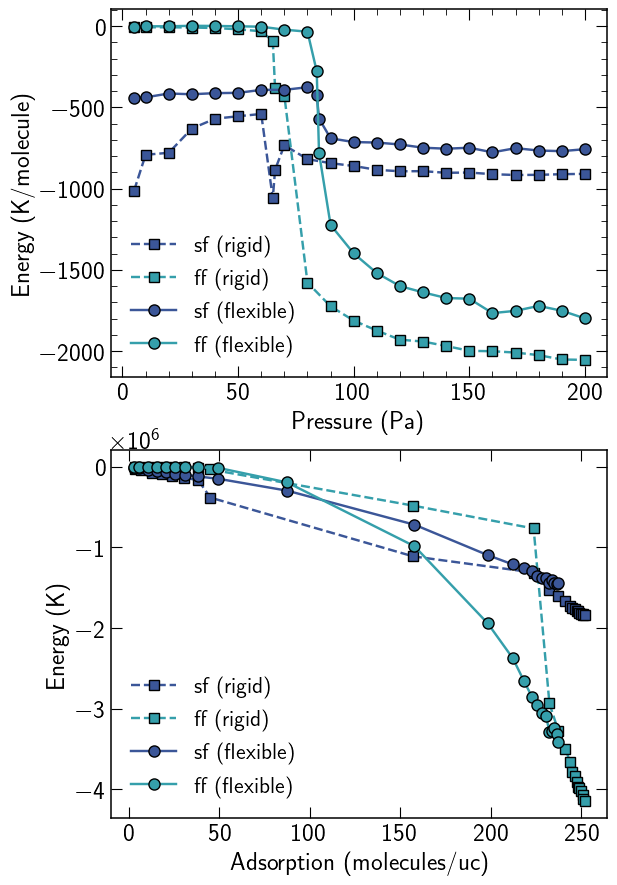

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.4, 10.5))

ax1.plot(rig2['Pressure (Pa)'], (rig2['Solid-fluid energy (K)'])/(rig2['Adsorption (molecules/uc)']*8),'--s', color=colors[2],
         lw=1.75, ms=7, mec='k', label=r'sf (rigid)')
ax1.plot(rig2['Pressure (Pa)'], (rig2['Fluid-fluid energy (K)'])/(rig2['Adsorption (molecules/uc)']*8),'--s', color=colors[4],
         lw=1.75, ms=7, mec='k', label=r'ff (rigid)')
ax1.plot(fl2['Pressure (Pa)'], (fl2['Solid-fluid energy (K)'])/(fl2['Adsorption (molecules/uc)']*8),'-o', color=colors[2],
         lw=1.75, ms=8, mec='k', label=r'sf (flexible)')
ax1.plot(fl2['Pressure (Pa)'], (fl2['Fluid-fluid energy (K)'])/(fl2['Adsorption (molecules/uc)']*8),'-o', color=colors[4],
         lw=1.75, ms=8, mec='k', label=r'ff (flexible)')
ax1.set_xlabel('Pressure (Pa)', fontsize=18)
ax1.set_ylabel('Energy (K/molecule)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax1.tick_params(direction='in', right=True, top=True)
ax1.tick_params(labelsize=18)
ax1.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax1.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax1.legend(fontsize=16, frameon=False, edgecolor='k')

ax2.plot(rig2['Adsorption (molecules/uc)'], (rig2['Solid-fluid energy (K)']),'--s', color=colors[2],
         lw=1.75, ms=7, mec='k', label=r'sf (rigid)')
ax2.plot(rig2['Adsorption (molecules/uc)'], (rig2['Fluid-fluid energy (K)']),'--s', color=colors[4],
         lw=1.75, ms=7, mec='k', label=r'ff (rigid)')
ax2.plot(fl2['Adsorption (molecules/uc)'], fl2['Solid-fluid energy (K)'],'-o', color=colors[2],
         lw=1.75, ms=8, mec='k', label=r'sf (flexible)')
ax2.plot(fl2['Adsorption (molecules/uc)'], fl2['Fluid-fluid energy (K)'],'-o', color=colors[4],
         lw=1.75, ms=8, mec='k', label=r'ff (flexible)')
ax2.set_xlabel('Adsorption (molecules/uc)', fontsize=18)
ax2.set_ylabel('Energy (K)', fontsize=18)
# ax1.set_xlim((-0.02, 0.42))
# ax1.set_ylim((-1., 35.))
ax1.minorticks_on()
ax2.tick_params(direction='in', right=True, top=True)
ax2.tick_params(labelsize=18)
ax2.tick_params(direction='in', which='minor', length=4, bottom=True, top=True, left=True, right=True)
ax2.tick_params(direction='in', which='major', length=8, bottom=True, top=True, left=True, right=True)
ax2.legend(fontsize=16, frameon=False, edgecolor='k')
plt.savefig('energy_argon_si_c.pdf', bbox_inches='tight')